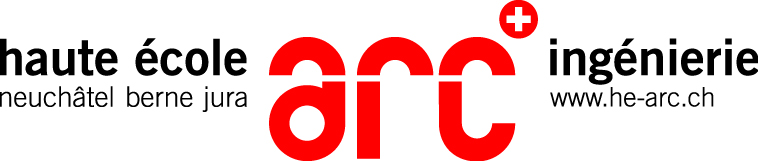

Tous droits réservés.

# Titre du projet (proposition: "MineStat" en l'honneur du jeux le plus jouer)

### Professeur : Benoit Le Callennec
### Auteurs : Ayman Akram et Rafael Teixeira

## Sommaire

1. Number of games by genre.
2. Most played games.
3. Correlation between release date and ~reviews/plays.

## Introduction

We want to statistically analyze a database of video games, answering questions about their characteristics, popularity and evolution over time. We also want to extract key information about their genres, popularity and various correlations.

•	Au début de votre notebook, mettez un aperçu des résultats finaux. C’est utile pour que le lecteur comprenne rapidement de quoi on parle.

In [1]:
# Install dependencies

#!pip install pandas matplotlib ipywidgets kaggle

1. Number of games by genre.
We use "Genres" columns.

In [2]:
# Loading data
import os
import pandas as pd

file_path = "Datasets/Data/backloggd_games.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(df.shape) # row and columns
    print(df.columns) # name/index
    df.head() # Preview

else:
    print("The file does not exist. Check the path or place the file in the correct location")

(60000, 14)
Index(['Unnamed: 0', 'Title', 'Release_Date', 'Developers', 'Summary',
       'Platforms', 'Genres', 'Rating', 'Plays', 'Playing', 'Backlogs',
       'Wishlist', 'Lists', 'Reviews'],
      dtype='object')


In [3]:
# Remove missing values, convert to string, and clean characters like [], '
all_genres = df['Genres'].dropna().astype(str).str.replace(r'[\[\]\']', '', regex=True)

# Split genres by comma, explode into rows, and strip whitespace
all_genres = all_genres.str.split(',').explode().str.strip()


# We remove empty genres 
all_genres = all_genres[all_genres != ""]

print(all_genres)


0        Adventure
0              RPG
1        Adventure
1           Puzzle
2        Adventure
           ...    
59996          RPG
59996     Tactical
59998          RPG
59999          RPG
59999     Tactical
Name: Genres, Length: 108457, dtype: object


In [4]:
# Counting occurrences
genre_counts = all_genres.value_counts()
print("Number of games by genre :\n", genre_counts.head(10))

Number of games by genre :
 Genres
Adventure    19368
Indie        16816
RPG           9234
Simulator     8050
Strategy      7766
Shooter       7258
Puzzle        6935
Platform      6126
Arcade        5603
Sport         3912
Name: count, dtype: int64


In [5]:
import matplotlib.pyplot as plt
from ipywidgets import IntSlider, interactive_output, VBox
from IPython.display import display 

# Widget to select how many genres to display
top_n_slider1 = IntSlider(value=10, min=1, max=23, step=1, description='Top Game Genres:')

# Graphical
def plot_top_n1(n):
    plt.figure(figsize=(12, 6))
    genre_counts.head(n).plot(kind='bar')
    plt.title(f"Top {n} Game Genres")
    plt.xlabel("Genre")
    plt.ylabel("Number of games")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


# Binding and display
display(VBox([top_n_slider1, interactive_output(plot_top_n1, {'n': top_n_slider1})]))

We see that video games that are of the adventure and indie genre are produced much more than other genres.

2. Most played games.
We use "Plays" and "Title" columns.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import IntSlider, interactive_output, VBox
from IPython.display import display

df = pd.read_csv("Datasets/Data/backloggd_games.csv")

# Convert K and M abbreviations to integers
def parse_play_count(x):
    x = str(x).replace(',', '').strip().upper()
    if x.endswith('K'):
        return int(float(x[:-1]) * 1_000)
    elif x.endswith('M'):
        return int(float(x[:-1]) * 1_000_000)
    elif x.isdigit():
        return int(x)
    else:
        return None

# Parsing
df['Cumulative_number_plays'] = df['Plays'].apply(parse_play_count)
df = df[df['Title'].notna() & df['Cumulative_number_plays'].notna()]


In [ ]:

# Widget to select how many genres to display
top_n_slider2 = IntSlider(value=10, min=1, max=100, step=1, description='Top Played Games:')

# Graphical
def plot_top_n2(n):
    top_df = df[['Title', 'Cumulative_number_plays']] \
        .sort_values(by='Cumulative_number_plays', ascending=False) \
        .head(n)

    plt.figure(figsize=(12, 10))
    plt.bar(top_df['Title'], top_df['Cumulative_number_plays'])
    plt.title(f"Top {n} Most played games")
    plt.xlabel("Title of games")
    plt.ylabel("Number of games")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Binding and display
display(VBox([top_n_slider2, interactive_output(plot_top_n2, {'n': top_n_slider2})]))


We see that the most played game is Minecraft, it is the one that allows the greatest creativity and the most freedom.